In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
train_raw = pd.read_csv("./dataset/titanic/train.csv")
test_raw = pd.read_csv("./dataset/titanic/test.csv")

In [35]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# Ticket, Embarked seem meaningless. Drop these columns
train_raw = train_raw.drop(['Ticket', 'Embarked'], axis = 1, inplace = False).copy()
test_raw = test_raw.drop(['Ticket', 'Embarked'], axis = 1, inplace = False).copy()

In [37]:
train_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
dtype: int64

In [38]:
train_raw.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Cabin          204
dtype: int64

In [39]:
#  Feature Cabin has more null values than actual values. Drop this column.
train_raw = train_raw.drop(['Cabin'], axis = 1).copy()
test_raw = test_raw.drop(['Cabin'], axis = 1).copy()

## Compare features with survived from training dataset

### Types of features <br>
#### Ordinal Feature<br>
Pclass <br>
#### Categorical Feature <br>
Sex, Cabin <br>
#### Continuous Feature <br>
Fare, Age <br>
#### Discrete Feature <br>
SibSp, Parch

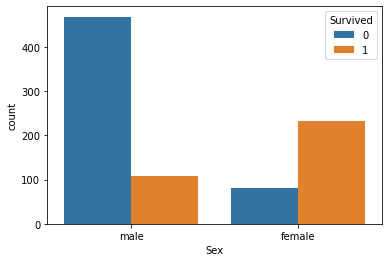

In [40]:
sex_vs_survived = train_raw[['Sex', 'Survived']]
sns.countplot('Sex', data = sex_vs_survived, hue = 'Survived')
plt.show()



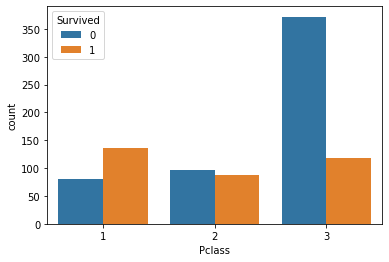

In [41]:
pclass_vs_survived = train_raw[['Pclass', 'Survived']]
sns.countplot('Pclass', data = pclass_vs_survived, hue = 'Survived')
plt.show()

In [42]:
# Find median age values using names

In [43]:
train_raw['Title'] = 0
for i in train_raw:
    train_raw['Title'] = train_raw.Name.str.extract('([A-Za-z]+)\.')
train_raw['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [44]:
pd.crosstab(train_raw.Sex, train_raw.Title).style.background_gradient(cmap = 'summer_r')

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [45]:

train_raw['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 
                            'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], ['Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 
                            'Miss', 'Mr', 'Master', 'Miss', 'Miss', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mr'], inplace = True )




In [46]:
train_raw.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      22.033113
Mr        33.022727
Mrs       35.871560
Name: Age, dtype: float64

In [49]:
train_raw.loc[(train_raw.Age.isnull())&(train_raw.Title=='Mr'),'Age']=33
train_raw.loc[(train_raw.Age.isnull())&(train_raw.Title=='Mrs'),'Age']=36
train_raw.loc[(train_raw.Age.isnull())&(train_raw.Title=='Master'),'Age']=5
train_raw.loc[(train_raw.Age.isnull())&(train_raw.Title=='Miss'),'Age']=22

In [51]:
train_raw.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
dtype: int64

In [52]:
# Create an age band

In [55]:
train_raw['Age'].describe()

count    891.000000
mean      29.841942
std       13.281525
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [56]:
# max age = 80 -> create 5 age categories

In [64]:
train_raw['Age_band'] = 0

def age_band(data):
    if data['Age'] > 0 and data['Age'] <= 16:
        return 1
    if data['Age'] > 16 and data['Age'] <= 32:
        return 2
    if data['Age'] > 32 and data['Age'] <= 48:
        return 3
    if data['Age'] > 48 and data['Age'] <= 64:
        return 4
    if data['Age'] > 64 and data['Age'] <= 80:
        return 5
    return 'Other'

train_raw['Age_band'] = train_raw.apply(lambda data: age_band(data), axis = 1)



In [65]:
train_raw.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Mr,3
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,8.4583,Mr,3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,Mr,4
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,Master,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,Mrs,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,Mrs,1


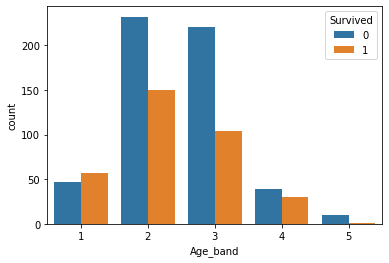

In [66]:
age_band_vs_survived = train_raw[['Age_band', 'Survived']]
sns.countplot('Age_band', data = age_band_vs_survived, hue = 'Survived')
plt.show()

In [67]:
train_raw['Family_size'] = 0
train_raw['Family_size'] = train_raw['SibSp'] + train_raw['Parch']
train_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,Age_band,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Mrs,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Miss,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Mrs,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Mr,3,0
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,8.4583,Mr,3,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,Mr,4,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,Master,1,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,Mrs,2,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,Mrs,1,1


In [68]:
train_raw['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [72]:
train_raw['Fare_range'] = pd.qcut(train_raw['Fare'], 5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,Age_band,Family_size,Fare_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Mr,2,1,"(-0.001, 7.854]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Mrs,3,1,"(39.688, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Miss,2,0,"(7.854, 10.5]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Mrs,3,1,"(39.688, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Mr,3,0,"(7.854, 10.5]"


In [71]:
pd.crosstab(train_raw.Survived, train_raw.Fare_range).style.background_gradient(cmap = 'summer_r')

Fare_range,"(-0.001, 7.854]","(7.854, 10.5]","(10.5, 21.679]","(21.679, 39.688]","(39.688, 512.329]"
Survived,,,,,
0,140,147,99,100,63
1,39,37,73,80,113


In [74]:
train_raw['Fare_band'] = 0

def fare_band(data):
    if data['Fare'] >= 0 and data['Fare'] <= 7.854:
        return 1
    
    if data['Fare'] > 7.854 and data['Fare'] <= 10.5:
        return 2
    
    if data['Fare'] > 10.5 and data['Fare'] <= 21.679:
        return 3
    
    if data['Fare'] > 21.679 and data['Fare'] <= 39.688:
        return 4
    
    if data['Fare'] > 39.688:
        return 5
    
    return 'Other'

train_raw['Fare_band'] = train_raw.apply(lambda data: fare_band(data), axis = 1)

train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,Age_band,Family_size,Fare_range,Fare_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Mr,2,1,"(-0.001, 7.854]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Mrs,3,1,"(39.688, 512.329]",5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Miss,2,0,"(7.854, 10.5]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Mrs,3,1,"(39.688, 512.329]",5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Mr,3,0,"(7.854, 10.5]",2


In [142]:
train_raw['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
train_raw['Title'].replace(['Mr', 'Mrs', 'Miss', 'Master'], [0, 1, 2, 3], inplace = True)

In [143]:
train_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,Age_band,Family_size,Fare_range,Fare_band
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,2,1,"(-0.001, 7.854]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,3,1,"(39.688, 512.329]",5
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2,2,0,"(7.854, 10.5]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,3,1,"(39.688, 512.329]",5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,3,0,"(7.854, 10.5]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,0,2,0,"(10.5, 21.679]",3
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,2,2,0,"(21.679, 39.688]",4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,23.4500,2,2,3,"(21.679, 39.688]",4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,0,2,0,"(21.679, 39.688]",4


In [145]:
train_raw.drop(['Name', 'Age', 'Fare_range', 'Fare', 'PassengerId'], axis = 1, inplace = True)

In [146]:
train_raw

,Survived,Pclass,Sex,SibSp,Parch,Title,Age_band,Family_size,Fare_band
0,0,3,0,1,0,0,2,1,1
1,1,1,1,1,0,1,3,1,5
2,1,3,1,0,0,2,2,0,2
3,1,1,1,1,0,1,3,1,5
4,0,3,0,0,0,0,3,0,2
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,2,0,3
887,1,1,1,0,0,2,2,0,4
888,0,3,1,1,2,2,2,3,4
889,1,1,0,0,0,0,2,0,4


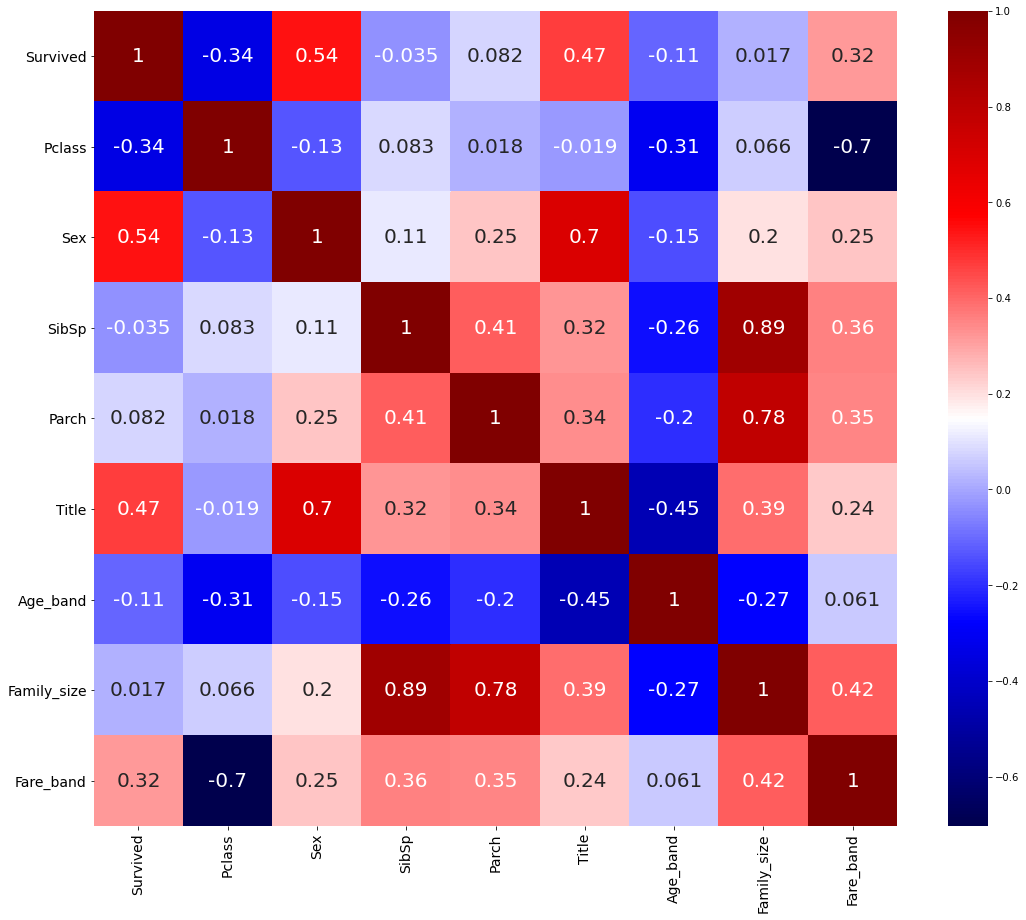

In [150]:

sns.heatmap(train_raw.corr(),annot=True,cmap='seismic', annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(train_raw, test_size = 0.2, random_state = 100, stratify = train_raw['Survived'])

In [156]:
train_X = train[train.columns[1:]]
train_y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_y = test[test.columns[:1]]

In [157]:
dt_model = DecisionTreeClassifier()

dt_model.fit(train_X, train_y)

prediction = dt_model.predict(test_X)

print('Accuracy of decision tree: ', metrics.accuracy_score(prediction, test_y))

Accuracy of decision tree:  0.7653631284916201


Pclass : 0.199
Sex : 0.006
SibSp : 0.020
Parch : 0.015
Title : 0.474
Age_band : 0.086
Family_size : 0.127
Fare_band : 0.073


<AxesSubplot:>

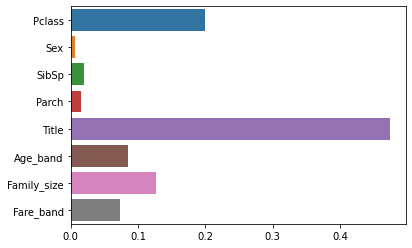

In [162]:

for name, value in zip(train_X.columns, dt_model.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x = dt_model.feature_importances_, y = train_X.columns)